<a href="https://colab.research.google.com/github/RahulKanwal/Whatsapp-Chats-Analysis/blob/main/Msg_Count_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Required Libraries.

In [ ]:
!pip install bar_chart_race

     |████████████████████████████████| 156 kB 7.0 MB/s 


In [ ]:
!pip install emoji # Optional. Use if you are extracting Unicode values of the emojis. 

     |████████████████████████████████| 170 kB 8.8 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=3a9326816d89efaf97a5773369ad61e8c0cf166fcd0398767d36d9581495667b
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


Importing Required Libraries.

In [ ]:
import re
import regex
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import emoji # Optional. Use if you are extracting Unicode values of the emojis. 
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
from os import path
from PIL import Image
from datetime import *
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import bar_chart_race as bcr
% matplotlib inline

Import and Work with exported WhatsApp Chats Text File. Extract chats data from the text file to make it in tabular form.

In [ ]:
# Function to check if the given line starts with a DateTime of the required format.
def startsWithDateTime(line):
  pattern = '^[0-9]+\/[0-9]+\/[0-9]+,\s[0-9]+:[0-9][0-9]\s(am|pm|AM|PM)\s-' # Regular Expression to identify the DateTime format.
  result = re.match(pattern, line)
  if result:
    return True
  else:
    return False

In [ ]:
# Function to check if the given line starts with a DateTime of the required format.
def startsWithAuthor(line):
  patterns = [
        '([\w]+):',                             # First Name
        '([\w]+[\s]+[\w]+):',                   # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+[\s]*[\d]*):',    # First Name + Middle Name + Last Name + Digits
        '([+]\d{2} \d{5} \d{5}):',              # Mobile Number (India)
        '([+]\d{2} \d{3} \d{3} \d{4}):',        # Mobile Number (US)
        '([\w]+)[\u263a-\U0001f999]+:',         # Name and Emoji              
    ]
  pattern = '^' + '|'.join(patterns)
  result = re.match(pattern, line)
  if result:
      return True
  return False

In [ ]:
# This is a function which will extract date, time, author, and message from the line.
def getDataPoint(line):
  # line = 06/03/21, 2:30 am - RK: hello.
  splitLine = line.split(' - ')  # splitLine = ['06/03/21, 2:30 am', 'RK: hello.']
  dateTime = splitLine[0] # dateTime = '03/06/21, 2:30 am'
  date, time = dateTime.split(', ') # date = '03/06/21'; time = '2:30 am'
  message = ' '.join(splitLine[1:]) # message = 'RK: hello.'
  author = None
  if startsWithAuthor(message):
    splitMessage = message.split(':', maxsplit=1) # splitMessage = ['RK', 'hello.']
    author = splitMessage[0] # author = 'RK'
    message = ' '.join(splitMessage[1:]) # message = ' hello.'
  else:
    author = None
  return date, time, author, message

In [ ]:
# It is a utility function to get the chats data of every month from the text files.
def parsedFileMonth(textFile):
  parsedData = []
  with open(textFile, encoding='utf-8') as fp:
    messageBuffer = []
    line = None
    date, time, author = None, None, None
    n = 0
    while True:
      line = fp.readline()
      if not line:
        print("count:", n) # Printing the number of messages in the chats file.
        break
      line = line.strip()
      if startsWithDateTime(line):
        n += 1
        if len(messageBuffer) > 0:
          parsedData.append([date, time, author, ' '.join(messageBuffer)])
        messageBuffer.clear()
        date, time, author, message = getDataPoint(line)
        messageBuffer.append(message)
      else:
        messageBuffer.append(line)
    parsedData.append([date, time, author, ' '.join(messageBuffer)])
    return parsedData

# Getting all the chats text files. 
# In place of all these files, you can import your own chat files.
textFileJan = '/content/drive/MyDrive/tRIP Chats Backup 2021/January tRIP.txt'
parsedJan = parsedFileMonth(textFileJan)
textFileFeb = '/content/drive/MyDrive/tRIP Chats Backup 2021/February tRIP.txt'
parsedFeb = parsedFileMonth(textFileFeb)
textFileMar = '/content/drive/MyDrive/tRIP Chats Backup 2021/March tRIP.txt'
parsedMar = parsedFileMonth(textFileMar)
textFileApr = '/content/drive/MyDrive/tRIP Chats Backup 2021/April tRIP.txt'
parsedApr = parsedFileMonth(textFileApr)
textFileMay = '/content/drive/MyDrive/tRIP Chats Backup 2021/May tRIP.txt'
parsedMay = parsedFileMonth(textFileMay)
textFileJun = '/content/drive/MyDrive/tRIP Chats Backup 2021/June tRIP.txt'
parsedJun = parsedFileMonth(textFileJun)
textFileJul = '/content/drive/MyDrive/tRIP Chats Backup 2021/July tRIP.txt'
parsedJul = parsedFileMonth(textFileJul)
textFileAug = '/content/drive/MyDrive/tRIP Chats Backup 2021/August tRIP.txt'
parsedAug = parsedFileMonth(textFileAug)
textFileSep = '/content/drive/MyDrive/tRIP Chats Backup 2021/September tRIP.txt'
parsedSep = parsedFileMonth(textFileSep)
textFileOct = '/content/drive/MyDrive/tRIP Chats Backup 2021/October tRIP.txt'
parsedOct = parsedFileMonth(textFileOct)
textFileNov = '/content/drive/MyDrive/tRIP Chats Backup 2021/November tRIP.txt'
parsedNov = parsedFileMonth(textFileNov)
textFileDec = '/content/drive/MyDrive/tRIP Chats Backup 2021/December tRIP.txt'
parsedDec = parsedFileMonth(textFileDec)

count: 12020
count: 15842
count: 20784
count: 18038
count: 24422
count: 17685
count: 9898
count: 9581
count: 10697
count: 9955
count: 7840
count: 7287


In [ ]:
# Making Dataframe from the parsed text file data.
# I did it for 12 different files. You can change it according to your needs.
chatsJan = pd.DataFrame(parsedJan, columns = ['Date', 'Time', 'Author', 'Message'])
chatsFeb = pd.DataFrame(parsedFeb, columns = ['Date', 'Time', 'Author', 'Message'])
chatsMar = pd.DataFrame(parsedMar, columns = ['Date', 'Time', 'Author', 'Message'])
chatsApr = pd.DataFrame(parsedApr, columns = ['Date', 'Time', 'Author', 'Message'])
chatsMay = pd.DataFrame(parsedMay, columns = ['Date', 'Time', 'Author', 'Message'])
chatsJun = pd.DataFrame(parsedJun, columns = ['Date', 'Time', 'Author', 'Message'])
chatsJul = pd.DataFrame(parsedJul, columns = ['Date', 'Time', 'Author', 'Message'])
chatsAug = pd.DataFrame(parsedAug, columns = ['Date', 'Time', 'Author', 'Message'])
chatsSep = pd.DataFrame(parsedSep, columns = ['Date', 'Time', 'Author', 'Message'])
chatsOct = pd.DataFrame(parsedOct, columns = ['Date', 'Time', 'Author', 'Message'])
chatsNov = pd.DataFrame(parsedNov, columns = ['Date', 'Time', 'Author', 'Message'])
chatsDec = pd.DataFrame(parsedDec, columns = ['Date', 'Time', 'Author', 'Message'])

chatsJan['Date'] = pd.to_datetime(chatsJan['Date'], format='%d/%m/%y')
chatsFeb['Date'] = pd.to_datetime(chatsFeb['Date'], format='%d/%m/%y')
chatsMar['Date'] = pd.to_datetime(chatsMar['Date'], format='%d/%m/%y')
chatsApr['Date'] = pd.to_datetime(chatsApr['Date'], format='%m/%d/%y')
chatsMay['Date'] = pd.to_datetime(chatsMay['Date'], format='%m/%d/%y')
chatsJun['Date'] = pd.to_datetime(chatsJun['Date'], format='%m/%d/%y')
chatsJul['Date'] = pd.to_datetime(chatsJul['Date'], format='%m/%d/%y')
chatsAug['Date'] = pd.to_datetime(chatsAug['Date'], format='%m/%d/%y')
chatsSep['Date'] = pd.to_datetime(chatsSep['Date'], format='%m/%d/%y')
chatsOct['Date'] = pd.to_datetime(chatsOct['Date'], format='%m/%d/%y')
chatsNov['Date'] = pd.to_datetime(chatsNov['Date'], format='%m/%d/%y')
chatsDec['Date'] = pd.to_datetime(chatsDec['Date'], format='%m/%d/%y')

print(chatsJan.shape, chatsFeb.shape, chatsMar.shape, chatsApr.shape, chatsMay.shape, chatsJun.shape, chatsJul.shape, chatsAug.shape, chatsSep.shape, chatsOct.shape, chatsNov.shape, chatsDec.shape)

(12020, 4) (15842, 4) (20784, 4) (18038, 4) (24422, 4) (17685, 4) (9898, 4) (9581, 4) (10697, 4) (9955, 4) (7840, 4) (7287, 4)


In [ ]:
# Making 1 single dataframe out of the 12 dataframes.
# Here also you can change it according to your needs.
frames = [chatsJan, chatsFeb, chatsMar, chatsApr, chatsMay, chatsJun, chatsJul, chatsAug, chatsSep, chatsOct, chatsNov, chatsDec]
chats = pd.concat(frames, ignore_index=True, axis=0)
chats

Date  ...                       Message
0      2021-01-01  ...        Happy new year public🥳
1      2021-01-01  ...          Happy New year bois🥳
2      2021-01-01  ...    Happy New Year bhailogs ❤️
3      2021-01-01  ...   Happy New year 🎈 Cheers !!!
4      2021-01-01  ...             Happy New Yearr 🍻
...           ...  ...                           ...
164044 2021-12-31  ...                             😂
164045 2021-12-31  ...               <Media omitted>
164046 2021-12-31  ...               <Media omitted>
164047 2021-12-31  ...      Haa aur tera 200% aata😆😆
164048 2021-12-31  ...                            🥺🥺

[164049 rows x 4 columns]

In [ ]:
# Remove Null Entries.
print("Before dropna():", chats.shape)
before = chats.shape[0]
chats = chats.dropna()
after = chats.shape[0]
print("After dropna():", chats.shape)
print("Difference:", before - after)

Before dropna(): (164049, 4)
After dropna(): (163936, 4)
Difference: 113


In [ ]:
# changing datatype of 'Author' column to str.
chats = chats.astype ({"Author": str, "Message": str})

In [ ]:
# Making some changes in the author name. Formatting the contact names.
chats.loc[chats['Author'] == 'Multicell Living Organism', 'Author'] = 'Rahul Kanwal VESIT' # Me :P
chats.loc[chats['Author'] == 'xxx xxxxx xxxxx', 'Author'] = 'Atharva Potdar VESIT' # Sorry Atharva. I did not had your number saved :/ But it's saved now :P
chats.loc[chats['Author'] == 'Yash Marke VESIT 2', 'Author'] = 'Yash Marke VESIT'

# Removing 'VESIT' from the names :P
for i in chats['Author'].unique():
  chats.loc[chats['Author'] == i, 'Author'] = i[:len(i) - 6]

chats.loc[chats['Author'] == 'Vardan', 'Author'] = 'Datta Muvvala Vardan' 

print('Done :D')

Done :D


In [ ]:
# A function to convert 12 hour (AM/PM) time format to 24 hour time format.
def makeTo24(time):
  m2 = str(time)
  in_time = datetime.strptime(m2, "%I:%M %p")
  out_time = datetime.strftime(in_time, "%H:%M")
  return out_time

print(makeTo24('11:33 PM'))

23:33


In [ ]:
# Changing the 'Time' column to 24 hour format.
chats['Time'] = chats['Time'].apply(makeTo24)
chats

Date   Time             Author                       Message
0      2021-01-01  00:02       Rahul Kanwal        Happy new year public🥳
1      2021-01-01  00:02     Mahesh Keswani          Happy New year bois🥳
2      2021-01-01  00:02  Kartik Chindarkar    Happy New Year bhailogs ❤️
3      2021-01-01  00:02     Atharva Potdar   Happy New year 🎈 Cheers !!!
4      2021-01-01  00:02       Sanjay Rohra             Happy New Yearr 🍻
...           ...    ...                ...                           ...
164044 2021-12-31  22:49     Mahesh Keswani                             😂
164045 2021-12-31  22:49       Rahul Kanwal               <Media omitted>
164046 2021-12-31  22:51  Kartik Chindarkar               <Media omitted>
164047 2021-12-31  23:04     Devesh Hinduja      Haa aur tera 200% aata😆😆
164048 2021-12-31  23:05       Rahul Kanwal                            🥺🥺

[163936 rows x 4 columns]

In [ ]:
# Function to get unicode value of emoji.
# def to_unicode(text):
#   return 'U+{:X}'.format(ord(text))

# Function to get the emojis from the text. It returns the list of emojis which are present in the text.
def split_count(text):
    emoji_list = re.findall(r'[^\w\s\!\@\#\$\%\^\&\*\(\)\-\=\+\*\.\[\]\{\}\'\"\;\:\,\>\<\`\~\?\/\\\ ]', text)

    # Code to get unicode value of the emojis. Return unicode_list variable.
    # unicode_list = []
    # for e in emoji_list:
    #   unicode_list.append(to_unicode(e))
    # text = str(text)
    # data = text.split(' ')
    # for word in data:
    #     if word in emoji.UNICODE_EMOJI:
    #         emoji_list.append(word)
    # return unicode_list
    
    return emoji_list

# Function to get the Links/URLs from the text.
def url_count(text):
  regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
  urls = re.findall(regex, str(text))
  return len(urls)
  # below return statement can be used to return actual list of urls/links 
  # return [url[0] for url in urls]

# Function to determine if the message is a media message or not.
def media(text):
  if text == " <Media omitted>":
    return 1
  else:
    return 0

# Function to determine if the message is a deleted message or not.
def deleted(text):
  if text == " This message was deleted" or text == " You deleted this message":
    return 1
  else:
    return 0

# Getting the total number of messages.
total_messages = chats.shape[0]

# Making new columns in the dataframe.
chats["Emoji"] = chats["Message"].apply(split_count)
emojis = sum(chats['Emoji'].str.len())

chats['url_count'] = chats['Message'].apply(url_count)
links = np.sum(chats['url_count'])

chats['IsMedia'] = chats['Message'].apply(media)
media = np.sum(chats['IsMedia'])

chats['IsDeleted'] = chats['Message'].apply(deleted)
deleted = np.sum(chats['IsDeleted'])

chats

Date   Time             Author  ... url_count IsMedia  IsDeleted
0      2021-01-01  00:02       Rahul Kanwal  ...         0       0          0
1      2021-01-01  00:02     Mahesh Keswani  ...         0       0          0
2      2021-01-01  00:02  Kartik Chindarkar  ...         0       0          0
3      2021-01-01  00:02     Atharva Potdar  ...         0       0          0
4      2021-01-01  00:02       Sanjay Rohra  ...         0       0          0
...           ...    ...                ...  ...       ...     ...        ...
164044 2021-12-31  22:49     Mahesh Keswani  ...         0       0          0
164045 2021-12-31  22:49       Rahul Kanwal  ...         0       1          0
164046 2021-12-31  22:51  Kartik Chindarkar  ...         0       1          0
164047 2021-12-31  23:04     Devesh Hinduja  ...         0       0          0
164048 2021-12-31  23:05       Rahul Kanwal  ...         0       0          0

[163936 rows x 8 columns]

Analysis of Data.

In [ ]:
# Printing general information about the chats.
print('Total Messages:', total_messages)
print('Media Messages:', media)
print('Links:', links)
print('Deleted Messages:', deleted)

Total Messages: 163936
Media Messages: 10072
Links: 1471
Deleted Messages: 1269


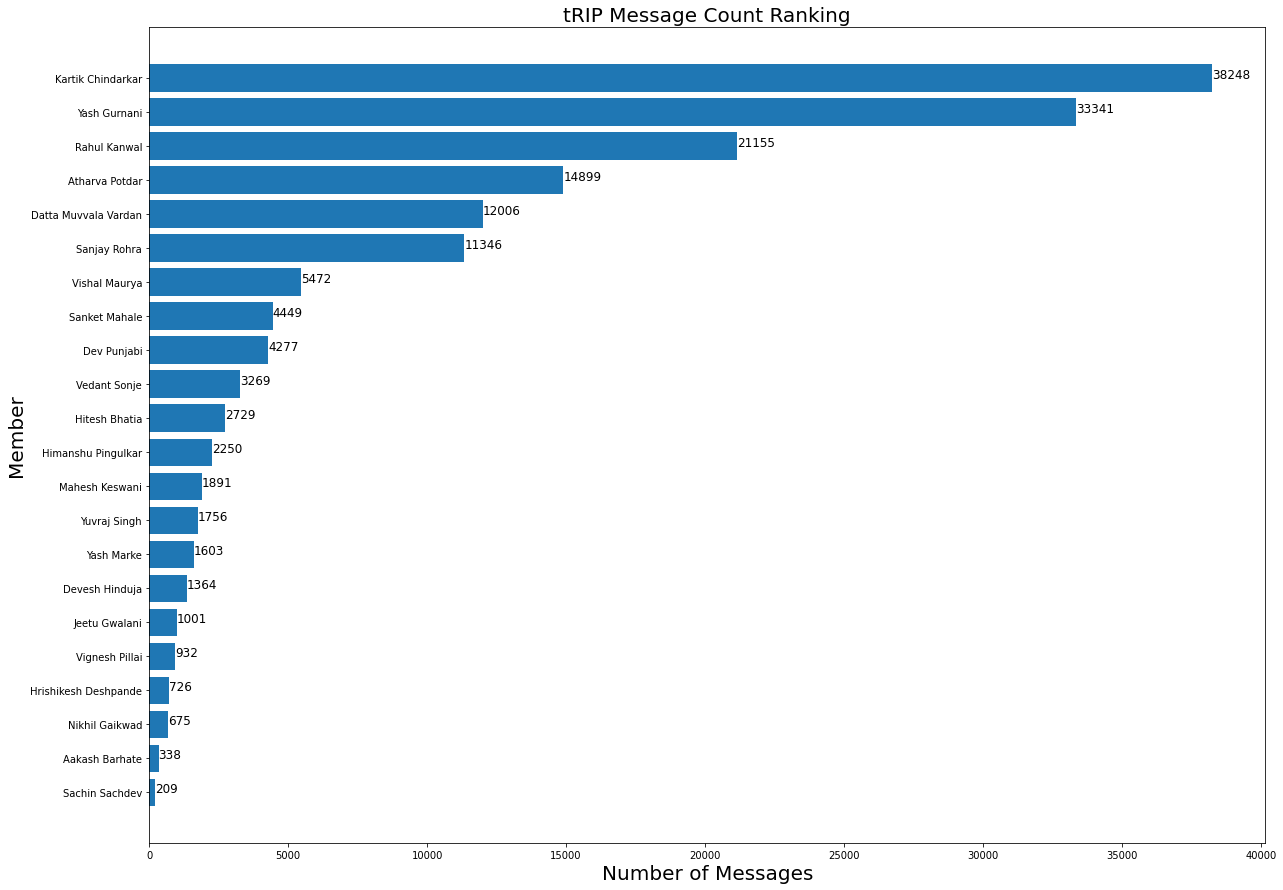

In [ ]:
# Bar plot to rank user according to number of messages sent.
data = pd.DataFrame(chats['Author'].value_counts()).reset_index() # Dataframe having Authors and their respective Message Counts in descending order.
data.columns = ['Name', 'Message Count'] # Naming the columns of the dataframe.
fig = plt.figure(figsize=(20, 15)) # Figure.

# current block
plt.barh(data['Name'], data['Message Count']) # Horizontal bar chart. Names on Y-axis, message counts of each person is the width.
plt.xlabel('Number of Messages', fontdict={'fontsize': 20})
plt.ylabel('Member', fontdict={'fontsize': 20})
plt.title('tRIP Message Count Ranking', fontdict={'fontsize': 20})
plt.gca().invert_yaxis() # Inverting y-axis i.e. the records will be in descending order. 
for index, value in enumerate(data['Message Count']): # for loop to put the number of messages as text on each bar.
  plt.text(value, index, str(value), fontsize=12)
plt.show() # Show the bar chart

In [ ]:
# Function to get count of letters/messages/words for each Member.
def get_letters(user):
  # exclude_messages_list = ['this message has been deleted', 'was added to chat', 'was removed from chat', 'left chat', 'sticker']
  words = chats[chats['Author'] == user] # Filtering the records according to the member.
  msg = ' '.join(str(msg) for msg in words.Message) # Combining all the messages in 1 variable.
  # get number of messages
  # return len(words.index)
  # get total number of words
  return len(msg.split(' '))
  # get number of characters(including spaces)
  # return len(msg)
  # get the message( one variable containing all the messages of the Member in a string)
  # return msg
print(get_letters('Rahul Kanwal'))

114386


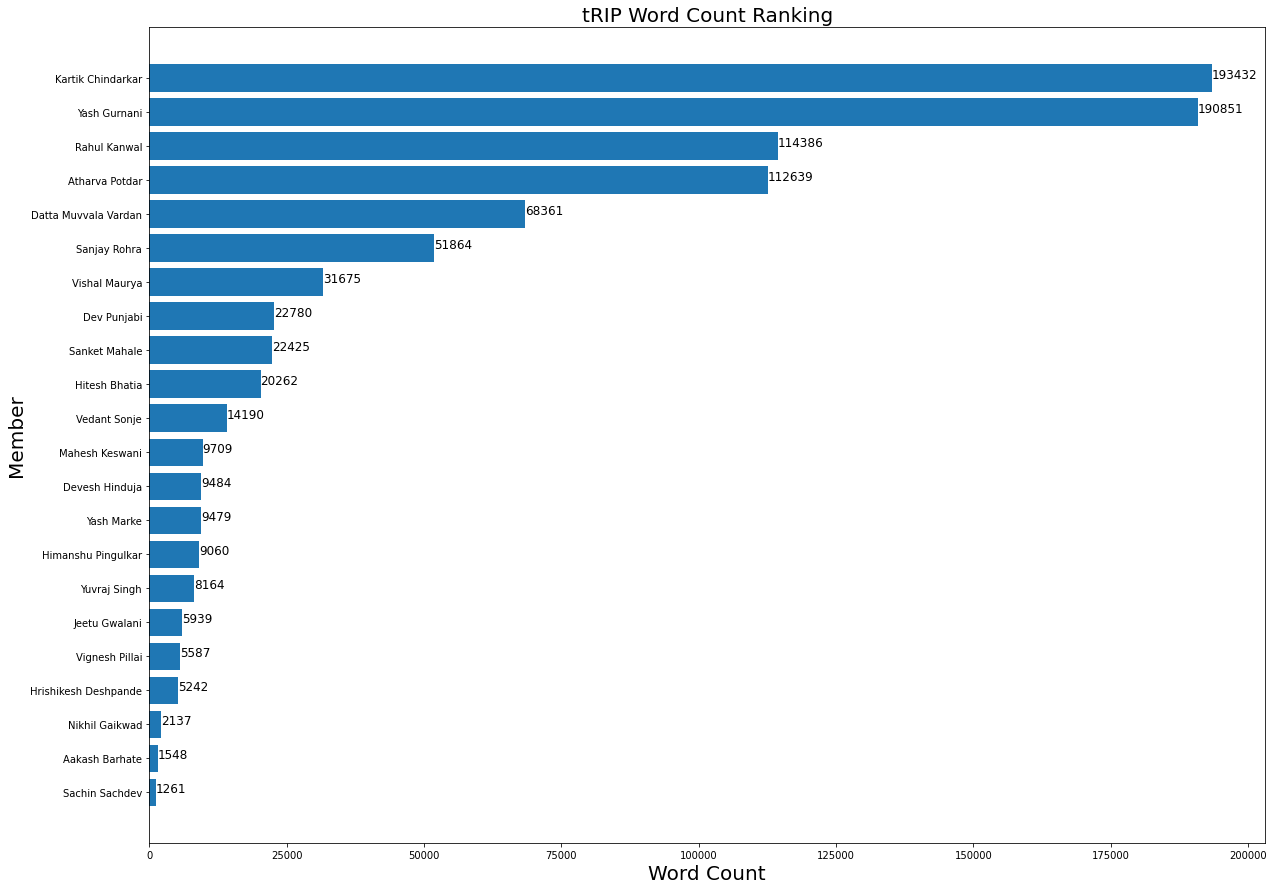

In [ ]:
# Bar plot to rank user according to the word count.
word_counts = [get_letters(i) for i in chats.Author.unique()] # List having word counts of each member.
word_counts_df = pd.DataFrame(list(zip(chats.Author.unique(), word_counts)), columns = ['Author', 'WordCount']) # Dataframe having 
word_counts_df = word_counts_df.sort_values(by=['WordCount'], ascending=False) # Sorting the dataframe records in descending order by 'WordCount' column.
fig = plt.figure(figsize=(20, 15)) # figure
plt.barh(word_counts_df['Author'], word_counts_df['WordCount']) # Horizontal bar chart. Names on Y-axis, WordCount of each person is the width.
plt.xlabel('Word Count', fontdict={'fontsize': 20})
plt.ylabel('Member', fontdict={'fontsize': 20})
plt.title('tRIP Word Count Ranking', fontdict={'fontsize': 20})
plt.gca().invert_yaxis() # Inverting y-axis i.e. the records will be in descending order.
for index, value in enumerate(word_counts_df['WordCount']): # for loop to put the WordCount as text on each bar.
  plt.text(value, index, str(value), fontsize=12)
plt.show() # Show the bar chart

# alternate code
# bar plot to rank user according to the word count.
# word_counts = messages_df.groupby('Author')['Word_Count'].agg('sum')
# word_counts = word_counts.to_frame().reset_index().sort_values(by=['Word_Count'], ascending=False)
# word_counts
# fig = plt.figure(figsize=(20, 20))

# plt.barh(word_counts_df['Author'], word_counts_df['WordCount'])
# plt.xlabel('Word Count')
# plt.ylabel('Member')
# plt.gca().invert_yaxis()
# for index, value in enumerate(word_counts_df['WordCount']):
#   plt.text(value, index, str(value))
# plt.show()

In [ ]:
# Making 1 variable out of all messages.
# exclude_messages_list = ['this message has been deleted', 'was added to chat', 'was removed from chat', 'left chat', 'sticker']
text = ' '.join(str(msg) for msg in chats.Message)

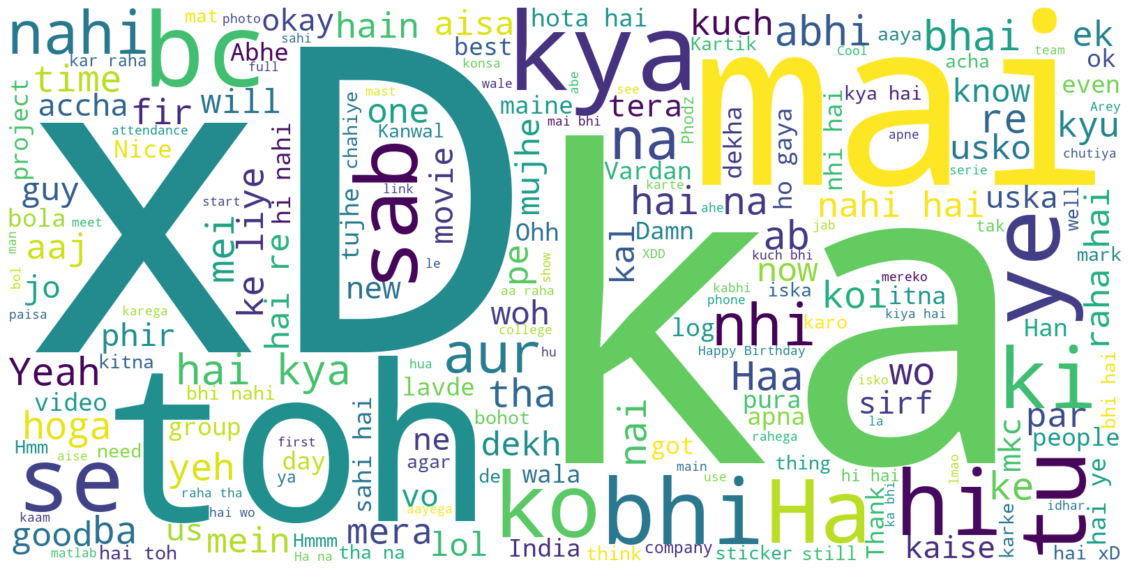

In [ ]:
# Wordcloud.
stopwords = set(STOPWORDS) # List of Stopwords for the wordcloud
# stopwords.update(['ha', 'haa', 'bc', 'mkc', 'and', 'toh','hai', 'na', 'a', 'an', 'the', 'XD', 'xD', 'kya', 'ka', 'mai', 'nhi', 'ye', 'bhi', 'nahi', 'sab', 'ab', 'aaya', 'abhi', 'vo', 'koi', 'wo', 'ko', 're', 'hi', 'tha', 'se', 'aur', 'ke', 'tu', 'woh', 'ki'])
stopwords.update([ 'Media', 'omitted', 'message', 'deleted', 'percentage', 'cgpa', 'https', 'youtu' ]) # Updating the Stopwords List to exclude the unnecessary words in the chats.
wordcloud = WordCloud(width=1600, height=800, stopwords=stopwords, background_color="white").generate(text) # Generate the wordcloud.
plt.figure(figsize=(20,12)) # Figure
plt.imshow(wordcloud, interpolation='bilinear') # Displaying the wordcloud as an image.
plt.axis("off") # Turn off axis labels
plt.show()

In [ ]:
# Creates a list of unique Members - ['Rahul', 'Yash', .........]
l = sorted(chats.Author.unique())
n = len(l)
for i in range(n):
  # Filtering out messages of particular Member
  user_df = chats[chats['Author'] == l[i]]
  print(f'{i+1}. Statistics of *{l[i]}* -')
  # shape will print number of rows which indirectly means the overall number of messages
  totalMessages = user_df.shape[0]
  print('Total Messages Sent:', totalMessages)
  links = sum(user_df.url_count)   
  print('Links Sent:', links)
  delete = np.sum(user_df.IsDeleted)
  print('Deleted Messages Sent:', delete)
  media = np.sum(user_df.IsMedia)
  print('Media Messages Sent:', media)
  text = user_df.shape[0] - media - delete - links
  print('Text Messages Sent:', text)
  wordsPerMessage = get_letters(l[i]) / totalMessages
  print('Average Words Per Message: {:.2f}'.format(wordsPerMessage))   
  percent = totalMessages / chats.shape[0] * 100
  print('Percentage of Total Messages: {:.2f}%'.format(percent))
  if i < n - 1:
    print('*------------------------------------------*')

# Total Messages
# Links Sent
# Deleted Messages
# Media Sent
# Text Messages Sent
# Avg Words per message
# Percentage

1. Statistics of *Aakash Barhate* -
Total Messages Sent: 338
Links Sent: 0
Deleted Messages Sent: 3
Media Messages Sent: 29
Text Messages Sent: 306
Average Words Per Message: 4.58
Percentage of Total Messages: 0.21%
*------------------------------------------*
2. Statistics of *Atharva Potdar* -
Total Messages Sent: 14899
Links Sent: 21
Deleted Messages Sent: 158
Media Messages Sent: 591
Text Messages Sent: 14129
Average Words Per Message: 7.56
Percentage of Total Messages: 9.09%
*------------------------------------------*
3. Statistics of *Datta Muvvala Vardan* -
Total Messages Sent: 12006
Links Sent: 94
Deleted Messages Sent: 201
Media Messages Sent: 778
Text Messages Sent: 10933
Average Words Per Message: 5.69
Percentage of Total Messages: 7.32%
*------------------------------------------*
4. Statistics of *Dev Punjabi* -
Total Messages Sent: 4277
Links Sent: 17
Deleted Messages Sent: 47
Media Messages Sent: 479
Text Messages Sent: 3734
Average Words Per Message: 5.33
Percentage of

In [ ]:
# Just a Code to print distinct emojis.
distinct_emojis = list(set(a for b in chats.Emoji for a in b))
print(distinct_emojis)
print(len(distinct_emojis))

['\U0001f7e3', '🌞', '🥬', '♪', '💛', '🦜', '⠄', '🚒', '🏴', '⡾', '⠈', '⡔', '⢹', '🦉', '💧', '⚡', '🗝', '🔹', '☁', '☕', '🇰', '😍', '⣹', '⠭', '⣆', '🤔', '⣶', '🗡', '😭', '×', '🖕', '♂', '⠻', '😃', '📚', '💙', '😁', '🤚', 'ू', '⡿', '🥶', '\U0001f9c3', '🏏', '🦏', '💨', '🤟', '🆗', '🔰', '🙋', '\u200b', '⠁', '⠿', '😩', '💉', '🍨', '🔥', '🕺', '🤗', '⏰', '🎶', '😶', '⠾', '😞', '😀', '🕵', '🍕', 'े', '💁', '⣴', '👉', '🔗', '🧨', '”', 'ॅ', '🇽', '⬆', '🥈', '🏿', '✈', '\U0001f9c8', '🥮', '😸', '🖖', '⣾', '\U0001f7ea', '💎', '😥', '😬', '🌈', '💄', '\U0001f7e7', '👎', '🔺', '🦆', '🏃', '⣥', '\U0001fa78', '👤', '🏾', '👏', '🛑', '🙌', '⠃', '|', '–', '⣩', '🧢', '🛐', '🥇', '🤯', '🙈', '🛫', '🧡', '👹', '🅱', '्', '😆', 'ृ', '📹', '✓', '🦲', '🙁', '💔', '💐', '🐜', '✔', '🏍', '😲', '😣', '⣄', '⢤', '🤷', '🏠', '🍛', '👆', '🌧', '͜', '🆒', '😴', '👀', '±', '▪', '⢄', '👑', '😤', '📉', '✨', '🍰', '🧟', '😳', '🌚', '⡘', '👳', '🛌', '💥', '😜', '👟', '🙆', '\u2068', '💓', '🌟', '♥', '🇳', '⢁', '🐎', '⣇', '🛴', '🙃', '🏻', '…', '🍬', '\U0001fa84', '☘', '⣟', '👨', '\U0001fa94', '👚', '💖', '⠀', '😐', '💋', '🙂', '🏐', '🇲

In [ ]:
# Code to get the ranking of most used emojis.
total_emojis = list(a for b in chats.Emoji for a in b) # Get all the emojis in a list.  
emoji_dict = dict(Counter(total_emojis)) # Making a dictionary(key-value pair) of all emojis.
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True) # Sorting the dictionary in descending order.
emoji_df = pd.DataFrame(emoji_dict, columns = ['emoji', 'count']) # Making a dataframe out of the emojis dictionary.
emoji_df['Rank'] = emoji_df['count'].rank(ascending = 0) # Ranking the emojis.
emoji_df = emoji_df.set_index('Rank') # Setting the 'Rank' column as index.
emoji_df.head(30) # Show top 30 Records.
# Note: The emojis which we can't see here are just unicode values used to give different shades of colours to the emojis. They are known as Variant Forms or Variation Selectors.

emoji  count
Rank             
1.0      😂  34985
2.0      😅   2339
3.0      🔥   2320
4.0      🤣   2168
5.0      🥲   1296
6.0      ️   1217
7.0      🏻    986
8.0      ‍    719
9.0      ♂    690
10.0     🙂    675
11.0     😪    559
12.0     🙌    556
13.0     👍    532
14.0     ⣿    509
15.0     😭    498
16.0     🙏    488
17.0     🥺    460
18.5     🥳    432
18.5     ⠀    432
20.0     ⁩    419
21.5     🌝    418
21.5     ⁨    418
23.0     👌    405
24.0     🤦    355
25.0     ❤    322
26.0     🎉    263
27.0     🙇    244
28.0     🥰    146
29.0     🍻    135
30.0     🌚    134

In [ ]:
# Old Code to get the chats of a particular Author.
person = 'Rahul Kanwal'
person_df = chats[chats['Author'] == person]
# Saving dataframe as CSV file.
# person_df = chats.loc[(chats['Author'] == person) & (chats['Date'] == '2021-04-26')]  # Filter according to Author and Date.
# person_df.to_csv('/content/drive/MyDrive/person.csv')
# print('Done')
person_df

Date   Time        Author  ... url_count IsMedia  IsDeleted
0      2021-01-01  00:02  Rahul Kanwal  ...         0       0          0
10     2021-01-01  00:05  Rahul Kanwal  ...         0       0          0
18     2021-01-01  00:08  Rahul Kanwal  ...         0       0          0
20     2021-01-01  00:09  Rahul Kanwal  ...         0       0          0
23     2021-01-01  00:09  Rahul Kanwal  ...         0       0          0
...           ...    ...           ...  ...       ...     ...        ...
164034 2021-12-31  22:34  Rahul Kanwal  ...         0       1          0
164036 2021-12-31  22:35  Rahul Kanwal  ...         0       1          0
164041 2021-12-31  22:49  Rahul Kanwal  ...         0       0          0
164045 2021-12-31  22:49  Rahul Kanwal  ...         0       1          0
164048 2021-12-31  23:05  Rahul Kanwal  ...         0       0          0

[21155 rows x 8 columns]

In [ ]:
# Old code to get Messages Progression Chart.
import plotly.graph_objects as go
date_df = person_df.groupby("Date")['Message'].count()
idx = pd.date_range('2021-01-01', '2021-12-31')
date_df.index = pd.DatetimeIndex(date_df.index)
date_df = date_df.reindex(idx, fill_value=0)
date_df = date_df.to_frame()
date_df.reset_index(inplace=True)
date_df.rename(columns = {'index':'Date', 'Message':'MessageCount'}, inplace = True)
date_df['7DayMA'] = date_df.iloc[:,1].rolling(window=7).mean()
plt.figure(figsize=[15,10])
# plt.grid(True)
# plt.plot(date_df['MessageCount'],label='data')
# plt.plot(date_df['7DayMA'],label='7 Day MA')
# plt.legend(loc=2)

# fig = go.Figure()
# fig.add_trace(go.Scatter(x=date_df.Date, y=date_df.MessageCount,
#                     mode='lines',
#                     name='Normal'))
# fig.add_trace(go.Scatter(x=date_df, y=date_df["7DayMA"],
#                     mode='lines+markers',
#                     name='7 Day MA'))
# fig.show()

fig = px.line(date_df, x="Date", y="MessageCount", title='tRIP Progression of Messages in 2021 for {0}.'.format(person))
fig.update_xaxes(nticks=30)
fig.show()

<Figure size 1080x720 with 0 Axes>

In [ ]:
# Messages Progression Chart.
date_df = chats.groupby("Date")['Message'].count() # Making a dataframe having date and the number of messages sent on that day.
idx = pd.date_range('2021-01-01', '2021-12-31') # Setting the range of dates for the chart and dataframe. It will also be used for the new index. Dates will be on X-Axis.
date_df.index = pd.DatetimeIndex(date_df.index) # Converting the index of the series to Datetime type.
date_df = date_df.reindex(idx, fill_value=0) # Reindex the series. MessageCount of values other than the specified date range in "idx", if any, will be made 0. 
date_df = date_df.to_frame() # Converting pandas series to dataframe.
date_df.reset_index(inplace=True) # Resetting the index of the dataframe.
date_df.rename(columns = {'index':'Date', 'Message':'MessageCount'}, inplace = True) # Renaming the columns.

date_df['7DayMA'] = date_df.iloc[:,1].rolling(window = 7).mean() # Making a new column in the dataframe to store 7 day moving average.
fig = go.Figure() # Figure.

# Adding the line chart of the message count.
fig.add_trace(go.Scatter(x=date_df.Date, y=date_df.MessageCount,
                    mode='lines',
                    name='No of Messages',
                    ))

# Adding the line chart of the 7 day moving average.
fig.add_trace(go.Scatter(x=date_df.Date, y=date_df["7DayMA"],
                    mode='lines+markers',
                    name='7 Day Moving Average',
                    ))

fig.update_layout(hovermode='x') # On hover, both MessageCount and 7DayMA should be seen.

fig.update_layout(
    title="tRIP Progression of Messages 2021",
    xaxis_title="Date",
    yaxis_title="Number of Messages",
)
fig.update_xaxes(nticks=20)
fig.show()

In [ ]:
chats['Date'].value_counts()

2021-05-10    2339
2021-04-26    2007
2021-03-15    1684
2021-02-11    1617
2021-03-12    1571
              ... 
2021-10-17      19
2021-11-09      17
2021-12-21      17
2021-11-29      15
2021-02-26      10
Name: Date, Length: 365, dtype: int64

In [ ]:
# Code to display week day wise distribution of messages on a pie chart.

# Function to return the week day for the passed number(0-6).
def dayofweek(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i]

day_df=pd.DataFrame(chats["Message"])
day_df['day_of_date'] = chats['Date'].dt.weekday # Getting the weekday number from the date.
day_df['day_of_date'] = day_df["day_of_date"].apply(dayofweek) # Applying the "dayofweek" function to "day_of_date" column.
weekdays = pd.DataFrame(day_df.day_of_date.value_counts()).reset_index() # Dataframe having Weekday and their respective Message Counts in descending order.
weekdays.columns = ['Day', 'MessageCount'] # Naming the columns.

fig = px.pie(weekdays, values='MessageCount', names='Day', title='tRIP Messages by Day of the Week') # Making the pie chart by passing the values.
fig.update_traces(textposition='inside', textinfo='percent+label+value') # Putting text inside the traces(records).
fig.show()

In [ ]:
times = pd.DatetimeIndex(chats.Time) # Making a series of Datetime.
times_df = pd.DataFrame(times.hour.value_counts()) # Making a DataFrame having hours and their respective Message Counts in descending order.
times_df.sort_index(axis = 0, inplace=True) # Sorting the dataframe according to the index i.e. Hours.
times_df.rename(columns={'Time':'MessageCount'}, inplace=True) # Renaming the columns.
# Converting the hours from 24 hour format to 12 hour(AM/PM) format.
hours = [] 
for i in range(0,24):
  if i == 0:
    hours.append("12 AM")
  elif i == 12:
    hours.append("12 PM")
  elif i < 12:
    hours.append(str(i) + " AM")
  else:
    hours.append(str(i - 12) + " PM")
times_df['Hour'] = hours
times_df

MessageCount   Hour
0          11117  12 AM
1           4379   1 AM
2           1009   2 AM
3            863   3 AM
4            168   4 AM
5            161   5 AM
6            267   6 AM
7            311   7 AM
8            774   8 AM
9           2571   9 AM
10          6707  10 AM
11          9981  11 AM
12          8516  12 PM
13          7741   1 PM
14         13093   2 PM
15         10698   3 PM
16          7550   4 PM
17          8084   5 PM
18          8987   6 PM
19          9858   7 PM
20         11241   8 PM
21         10790   9 PM
22         12282  10 PM
23         16788  11 PM

In [ ]:
# Bar chart to show the hour wise distribution of the messages.
import plotly.express as px
fig = px.bar(times_df, x='Hour', y='MessageCount', title='tRIP Hour Wise Distribution 2021', labels={'x':'Hour'}, text='MessageCount', color=times_df['Hour'])
fig.show()

In [ ]:
# Making a dataframe of Months and their respective message counts.
month = chats['Message'].groupby([chats['Date'].dt.month.rename('index')]).agg({'count'})
month['Month'] = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [ ]:
month

count      Month
index                  
1      12007    January
2      15838   February
3      20758      March
4      18034      April
5      24418        May
6      17678       June
7       9893       July
8       9563     August
9      10693  September
10      9949    October
11      7831   November
12      7274   December

In [ ]:
# Bar chart to show the month wise distribution of the messages.
fig = px.bar(month, x=month['Month'], y='count', title='tRIP Month Wise Distribution 2021', labels={'count': 'Message Count'}, text='count', color=month['Month'])
fig.show()

Code to make the progression video.

In [ ]:
data = chats[['Date', 'Author']]
data = chats.groupby([chats.Date, chats.Author]).size().unstack(fill_value=0).stack() # Logic to get the number of messages sent by each member on all dates.
data = pd.DataFrame(data).reset_index()
data.rename(columns = {0:'Frequency'}, inplace = True)  
data.head(22) # Seeing first 22 records because 22 members are there in the group :P

Date                Author  Frequency
0  2021-01-01        Aakash Barhate          1
1  2021-01-01        Atharva Potdar         19
2  2021-01-01  Datta Muvvala Vardan         10
3  2021-01-01           Dev Punjabi         10
4  2021-01-01        Devesh Hinduja          0
5  2021-01-01    Himanshu Pingulkar          5
6  2021-01-01         Hitesh Bhatia          0
7  2021-01-01  Hrishikesh Deshpande          0
8  2021-01-01         Jeetu Gwalani          1
9  2021-01-01     Kartik Chindarkar         38
10 2021-01-01        Mahesh Keswani          2
11 2021-01-01        Nikhil Gaikwad          4
12 2021-01-01          Rahul Kanwal         16
13 2021-01-01        Sachin Sachdev          0
14 2021-01-01          Sanjay Rohra          3
15 2021-01-01         Sanket Mahale          1
16 2021-01-01          Vedant Sonje          2
17 2021-01-01        Vignesh Pillai          1
18 2021-01-01         Vishal Maurya          6
19 2021-01-01          Yash Gurnani         25
20 2021-01-01            Yash Marke          1
21 2021-01-01          Yuvraj Singh          9

In [ ]:
# Pivot table logic to get the dataframe as a spreadsheet.
# Author names as columns, Dates as index/ rows, and Frequency as values.
df = pd.pivot_table(data, index = 'Date', columns = ['Author'], values = 'Frequency') 
df1 = df.cumsum(axis = 0) # Cumulative sum. 
df1.head()

Author      Aakash Barhate  Atharva Potdar  ...  Yash Marke  Yuvraj Singh
Date                                        ...                          
2021-01-01               1              19  ...           1             9
2021-01-02               1              31  ...           1            21
2021-01-03               1              66  ...           1            22
2021-01-04               1              82  ...           1            45
2021-01-05               1             175  ...           1            46

[5 rows x 22 columns]

In [ ]:
# Making the progression video from the data.
bcr.bar_chart_race(df =  df1, title = 'tRIP Messages Race 2021')